In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

cars=pd.read_csv(r"C:\Users\Ameya\Desktop\archive\car data.csv")
data=pd.DataFrame(cars)
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [92]:
print(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [93]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [94]:
print(data.tail())

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
data.dropna(inplace=True)
data = data.drop_duplicates(keep='first')
y=data['Selling_Price']
features=['Car_Name', 'Year', 'Present_Price', 'Driven_kms','Fuel_Type', 'Selling_type', 'Transmission',"Owner"]
X=data[features]

X = pd.get_dummies(X, columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [97]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=50)

model=RandomForestRegressor(random_state=50)
model.fit(train_X,train_y)
prediction=model.predict(test_X)

mae=mean_absolute_error(test_y,prediction)
print("Mean Absolute Error=",mae)

Mean Absolute Error= 0.9868866666666672


In [98]:
mape = np.mean(np.abs((test_y - prediction) / test_y)) * 100
print("Mean absolute percentage error=",mape,"%")

Mean absolute percentage error= 13.347305598237275 %


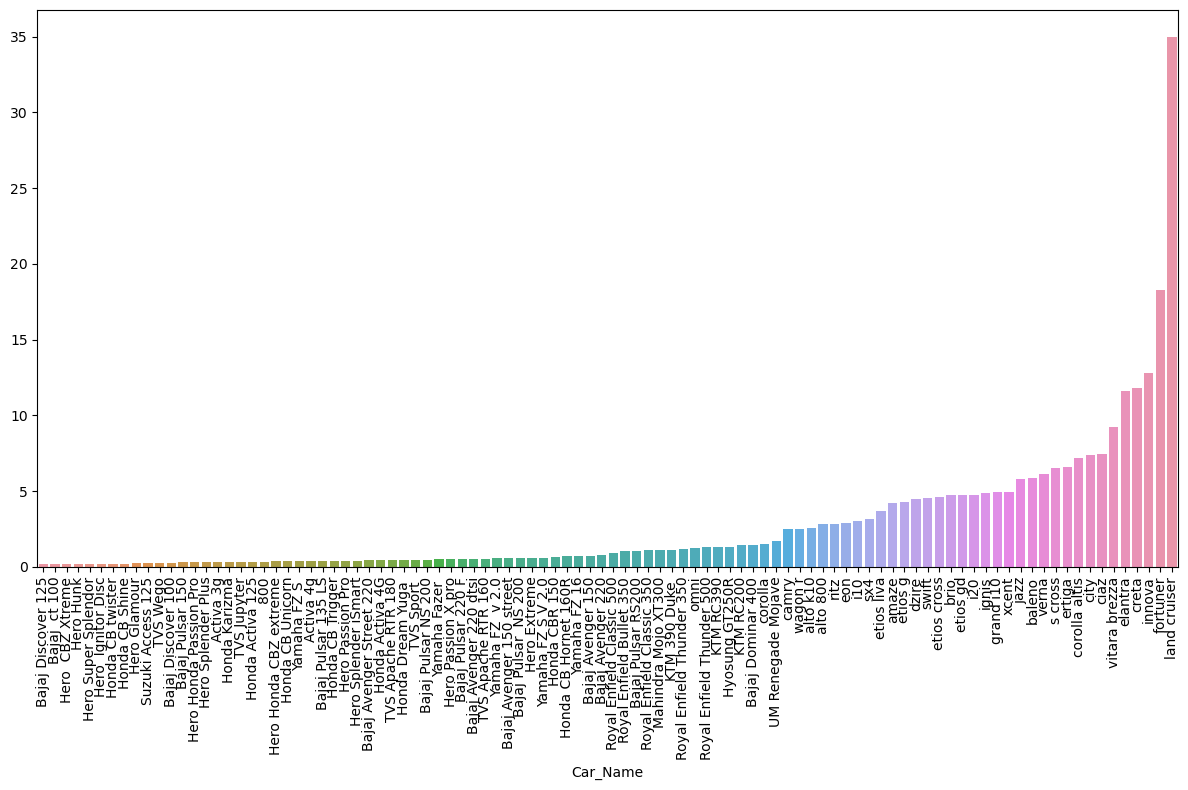

In [99]:
import matplotlib.pyplot as plt
import seaborn as sbs

temp = data.groupby('Car_Name')['Selling_Price'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()